# <center> PCA based Face Recognition </center>

We will use the <b>ORL database</b>, available to anyone on <a href="http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html"> AT&T’s web site</a>. This database contains images showing the faces of 40 people. Each one of them was photographed 10 times. These photos are stored as images in grey levels with 112x92 pixels. In our example, we constructed a <b>catalog called orlfaces</b>, comprised of the catalogs named $s_1, s_2, . . . , s_{40}$, each one of them containing the 10 images we are going to process. The data has been split in two parts train and test. For each catalog we use the first 9 photos for training and the last photo for test.

In [46]:
import numpy as np
import PIL.Image as img
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['figure.figsize'] = (17.0, 5.0)
matplotlib.rcParams['font.size'] = 15

### 1- Load the training data

In [47]:
img_size = (84, 69)

trainimgs = np.empty([360, img_size[0], img_size[1]], np.float32)
trainlabels = np.empty(360, np.int32)
for i in range(40):
    for j in range(9):
        img_opened = img.open("orl_faces/Train/s" + str(i + 1) + "/" + str(j+1) + ".pgm")
        trainimgs[i * 9 + j,] = img_opened.resize((img_size[1], img_size[0]))
        trainlabels[i * 9 + j] = i

### 2- Display image example

In [48]:
print("image size: ", trainimgs[1,].shape)

image size:  (84, 69)


In [49]:
index = np.random.randint(trainimgs.shape[0])
print("trainims[", index, "] : label : ",  trainlabels[index])
plt.imshow(trainimgs[index,], cmap='Greys_r')
plt.axis('off');

trainims[ 92 ] : label :  10


### Convert each image of shape (112 x 92) into a column vector of dimension (10304)

In [50]:
trainimgs = trainimgs.reshape((trainimgs.shape[0], trainimgs.shape[1] * trainimgs.shape[2]))
trainimgs.shape

(360, 5796)

### Using images of each of the 40 people in the training data, find a projection subspace $H$ which dimension is less than or equal to original dimension, and such as to have the maximum dispersion of the projections of training data. To extract this subspace, use PCA step which are described as follow:

    • Center the data.
    • Compute the correlation matrix.
    • Use SVD python function (np.linalg.svd)? (You can also use eig python function np.linalg.eigh)
    • Normalize the eigen vectors

In [51]:
trainimgs_mean = np.apply_along_axis(np.mean, 0, trainimgs)
trainimgs_centered = np.apply_along_axis(lambda x: x - trainimgs_mean, 1, trainimgs)

trainimgs_correlation = np.corrcoef(trainimgs_centered[...], rowvar=False)

trainimgs_correlation.shape

(5796, 5796)

### Plot the eigenvalues

In [52]:
eig_val, eig_vec = np.linalg.eigh(trainimgs_correlation)

In [53]:
print(eig_vec)
eig_vec.shape

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  2.62743280e-02
  -1.98154966e-02  1.07846958e-02]
 [ 3.23171579e-01 -4.60925729e-01 -5.43190249e-02 ...  2.63602493e-02
  -1.99606620e-02  1.08115913e-02]
 [-2.35296511e-01 -1.18638162e-01  1.26936702e-02 ...  2.63839457e-02
  -2.01217943e-02  1.07953561e-02]
 ...
 [ 4.12151866e-03  6.82316677e-03  4.93538746e-03 ...  1.35580443e-02
   6.00120202e-04 -1.21950346e-02]
 [-7.06669414e-03 -1.39340939e-02  3.85607424e-03 ...  1.34909886e-02
   1.75953139e-03 -1.30380464e-02]
 [-2.32629653e-02 -6.34699882e-03 -3.54600245e-03 ...  1.60528508e-02
  -3.22010413e-04 -1.30268874e-02]]


(5796, 5796)

### Plot the first 3 eigen faces and last eigen face (i.e., eigen vectors)

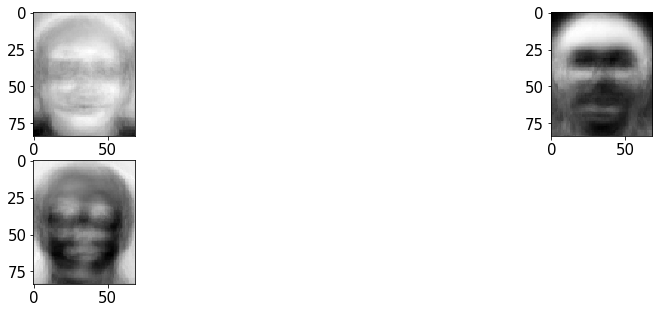

In [54]:
for i in range(0, 3):
    plt.subplot(2, 2, i + 1)
    plt.imshow(eig_vec[:, -i - 1].reshape(img_size), cmap='gray')

plt.show()

### Reconstruct one face example with its 10, 20, 30, and 40 eigenvectors. Plot and compare all the reconstructions. Also plot the original image, reconstructed image and difference between reconstruction and original image in each case.

(360, 5796)
(5796, 10)
92


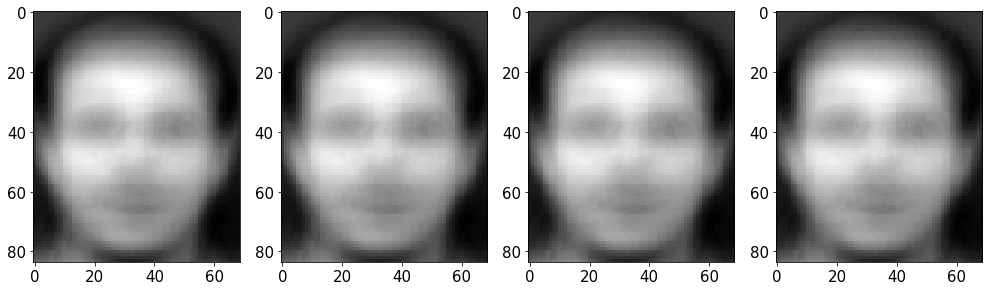

In [56]:
print(trainimgs_centered.shape)
print(eig_vec[:, :10].shape)

print(index)
for i in range(10, 45, 10):
    weights = np.dot(trainimgs_centered, eig_vec[:, :i])
    centered_vector = np.dot(weights[index, :], eig_vec[:, :i].T)
    recovered_image = (trainimgs_mean + centered_vector).reshape(img_size)
    plt.subplot(1, 4, i // 10)
    plt.imshow(recovered_image, cmap="gray")
    
plt.show()